In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.head(5)

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
X = df["Ground Temperature"].values.reshape(-1,1)
y = df["Chirps/Second"]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.30, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [ ]:
print('coefficient : ', reg.coef_)
print('Intercept : ',reg.intercept_)

coefficient :  [0.18555224]
Intercept :  1.832590685610299


In [ ]:
#!pip install matplotlib --upgrade

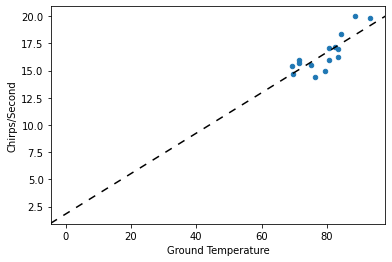

In [ ]:
# Plotting (Upgrade matplotlib if you get AttributeError)
df.plot(x = "Ground Temperature", y="Chirps/Second", kind = 'scatter')
m = reg.coef_
b = reg.intercept_
plt.axline(xy1=(0, b), slope=m, color='k',linestyle=(0, (5, 5)))
#plt.xlim(20, 100)
#plt.ylim(40, 100)

In [ ]:
# R-2 Score
reg.score(X_test,y_test)

0.6414136442401406

In [ ]:
y_pred = reg.predict(np.array([95,18]).reshape(-1,1))
print('# Chirp/second @ 95 degree F : {:.2f}'.format(y_pred[0])) # Extrapolate
print('# Chirp/second @ 18 degree F : {:.2f}'.format(y_pred[1])) #Interpolate

# Chirp/second @ 95 degree F : 19.46
# Chirp/second @ 18 degree F : 5.17


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.shape

(62, 2)

In [ ]:
df.head(5)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
X = df["Brain"].values.reshape(-1,1)
y = df["Body"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.20, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('coefficient : ', reg.coef_)
print('Intercept : ',reg.intercept_)

coefficient :  [0.96226945]
Intercept :  110.59496305861651


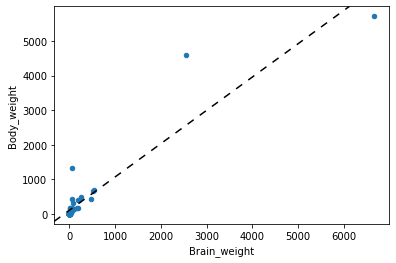

In [ ]:
# Plotting
df.plot(x = "Brain", y="Body", kind = 'scatter')
plt.xlabel("Brain_weight")
plt.ylabel("Body_weight")
m = reg.coef_
b = reg.intercept_
plt.axline(xy1=(0, b), slope=m, color='k',linestyle=(0, (5, 5)))
#plt.xlim(20, 100)
#plt.ylim(40, 100)

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
# R-2 Score
# Test dataset
reg.score(X_test,y_test)

-2.518781126165073

In [ ]:
# Train dataset
reg.score(X_train,y_train)

0.8719062671177942

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

89.42450217870942

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head(5)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
X =df[['Sex','Rank','Year','Degree','YSdeg']]# mileage, cylinders, liters, doors, cruise, sound, and leather
y= df['Salary']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.score(X_test,y_test)

0.7703483930642223

In [ ]:
#df.corr

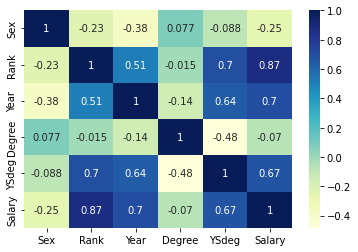

In [ ]:
import seaborn as sb
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

As from above heatmap its clear that the sex has negative correlation (-0.25) with the Salary predicted variable.

In [ ]:
# Lets check how the model performs if we remove sex from our feature variables
X =df[['Rank','Year','Degree','YSdeg']]# mileage, cylinders, liters, doors, cruise, sound, and leather
y= df['Salary']
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8486301100037981

Great! we're able improve our R2 score just by removal of redundant feature variable (i.e 'sex').